In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key


# https://cran.r-project.org/web/packages/eFRED/vignettes/FetchingDataFromFRED.html
# https://pypi.org/project/fredapi/
from fredapi import Fred

In [23]:
# Nasdaq Monthly Profit dataFrame
import yfinance as yf

stock_data = yf.download('QQQ', start='2014-01-01', end='2024-03-31', progress=False).reset_index()

# Date, Month Column creation by using Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month_Number'] = stock_data['Date'].dt.month    # Monthly Sort Column
stock_data['Month'] = stock_data['Date'].dt.strftime('%B')  # Convert date to month name

# Open price for each Year, Month & Close price for each Year, Month
year_monthly_data = stock_data.groupby(['Year', 'Month', 'Month_Number'])
first_open = year_monthly_data['Open'].first().reset_index()
last_close = year_monthly_data['Close'].last().reset_index()

# Year Monthly Profit 
year_monthly_profit = last_close['Close'] - first_open['Open']

# dataFrame creation
year_monthly_profit = pd.DataFrame({
                                    'Year': first_open['Year'],
                                    'Month': first_open['Month'],
                                    'Month_Number': first_open['Month_Number'],
                                    'Monthly_Profit': year_monthly_profit
                                })

year_monthly_avg_df = year_monthly_profit.groupby(['Year', 'Month', 'Month_Number'])['Monthly_Profit'].mean()
year_monthly_avg_df = year_monthly_avg_df.reset_index()
year_monthly_avg_df = year_monthly_avg_df.sort_values(['Year','Month_Number'])
year_monthly_avg_df

# monthly_avg_df = monthly_avg_df[['Month', 'Month_Number', 'Monthly_Profit_Avg']].sort_values('Month_Number')
# monthly_avg_df

,Year,Month,Month_Number,Monthly_Profit
4,2014,January,1,-1.280006
3,2014,February,2,4.229996
7,2014,March,3,-1.820000
0,2014,April,4,-0.709999
8,2014,May,5,3.779999
...,...,...,...,...
117,2023,November,11,37.109985
110,2023,December,12,21.769989
121,2024,January,1,11.130005
120,2024,February,2,20.209991


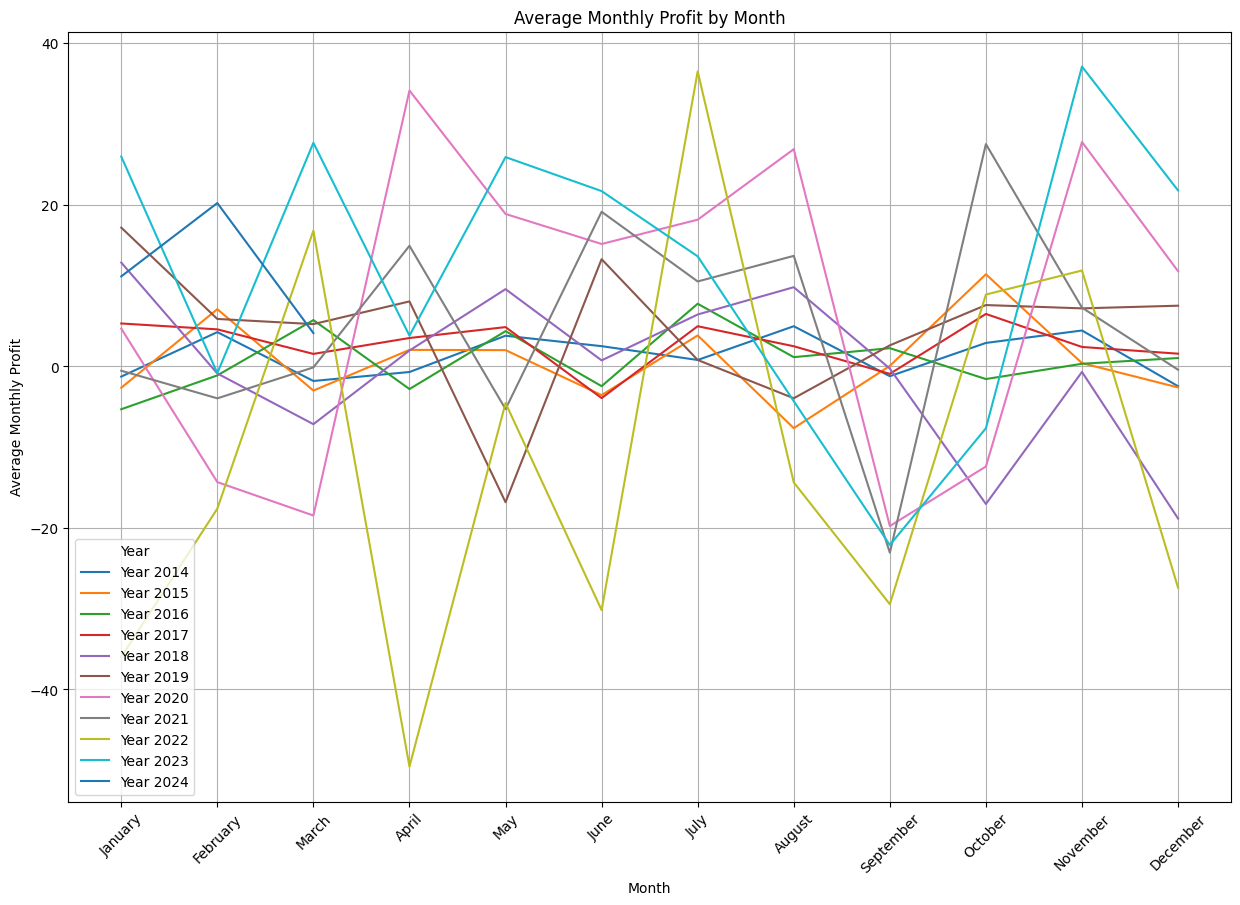

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))

# line plot for each year
years = year_monthly_avg_df['Year'].unique()

for year in years:
    filtered_df = year_monthly_avg_df.loc[year_monthly_avg_df['Year'] == year]
    plt.plot(filtered_df['Month'], filtered_df['Monthly_Profit'], label=f'Year {year}')

filtered_df

# setting Graph
ax.set_xlabel('Month')
ax.set_ylabel('Average Monthly Profit')
ax.set_title('Average Monthly Profit by Month')
ax.legend(title='Year')
plt.xticks(rotation=45)
ax.grid(True)

plt.show()

In [41]:
# Increase Probability for each Month?

# Add a new column to track positive profits
year_monthly_avg_df['Positive'] = year_monthly_avg_df['Monthly_Profit'] > 0

grouped = year_monthly_avg_df.groupby(['Month_Number', 'Month'])
total_counts = grouped.size()
positive_counts = grouped['Positive'].sum()

# Combine the results into a DataFrame
monthly_positive_counts = pd.DataFrame({
                                        'Positive_Count': positive_counts,
                                        'Total_Count': total_counts
                                        }).reset_index()

# Calculate the Probability of positive monthly profits
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Count'] / monthly_positive_counts['Total_Count'] * 100
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Prob'].round(2)


monthly_positive_counts


,Month_Number,Month,Positive_Count,Total_Count,Positive_Prob
0,1,January,6,11,54.55
1,2,February,5,11,45.45
2,3,March,6,11,54.55
3,4,April,7,10,70.00
4,5,May,7,10,70.00
5,6,June,6,10,60.00
6,7,July,10,10,100.00
7,8,August,6,10,60.00
8,9,September,3,10,30.00
9,10,October,6,10,60.00


<Axes: xlabel='Month'>

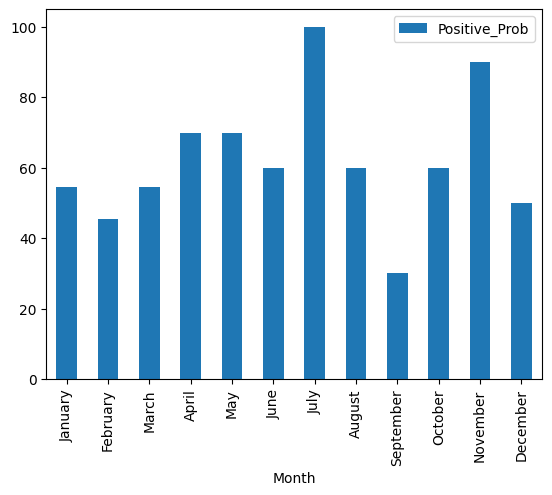

In [43]:
monthly_positive_counts.plot(kind="bar", x="Month", y="Positive_Prob")